Dataset is obtained from [10 food classes all data](https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip)

```
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the file 
import zipfile

zip_ref = zipfile.ZipFile('../10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

```

In [4]:
from helper_fun import *

Using tensorflow version: 2.4.1


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Visualize some random images

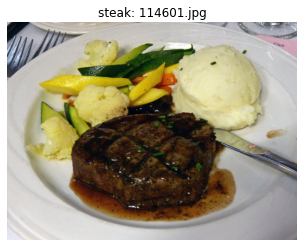

Image shape: (384, 512, 3)


In [6]:
view_random_image('10_food_classes_all_data/train/')

In [7]:
# set random seed
tf.random.set_seed(42)

# train and test dir
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

# Build data generator for the images
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

IMG_SIZE = (244, 244)

# Flow data from directory
train_data = train_datagen.flow_from_directory(directory= train_dir, 
                                               target_size= IMG_SIZE, 
                                               batch_size= 32,
                                               class_mode= 'categorical',
                                               seed = 42,
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(directory= test_dir, 
                                             target_size= IMG_SIZE, 
                                             batch_size= 32,
                                             class_mode= 'categorical',
                                             seed = 42,
                                             shuffle = True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a baseline model

In [8]:
# Set random seed
tf.random.set_seed(42)

# Build CNN model
model_1 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (244, 244, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# Compile the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = Adam(),
               metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 78s 192ms/step - loss: 2.2235 - accuracy: 0.1660 - val_loss: 1.9603 - val_accuracy: 0.3116
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.9067 - accuracy: 0.3369 - val_loss: 1.8863 - val_accuracy: 0.3360
Epoch 3/5
235/235 [==============================] - 44s 188ms/step - loss: 1.6309 - accuracy: 0.4507 - val_loss: 1.8579 - val_accuracy: 0.3512
Epoch 4/5
235/235 [==============================] - 44s 189ms/step - loss: 1.0064 - accuracy: 0.6896 - val_loss: 2.2104 - val_accuracy: 0.3180
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.3536 - accuracy: 0.9005 - val_loss: 3.0369 - val_accuracy: 0.3144


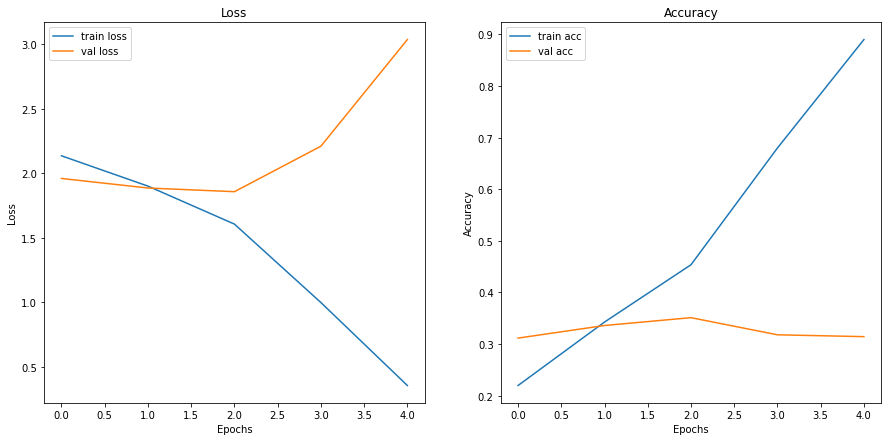

In [9]:
plot_history(history_1)

#### The model is overfitting, so we need to take measures to make the model more generalized.

1. Add more data
2. Simplify the model
3. Data Augmentation
4. Transfer learning

**Simplify the model**

In [10]:
# Set random seed
tf.random.set_seed(42)

# Build CNN model
model_2 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (244, 244, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# Compile the model
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = Adam(),
               metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 181ms/step - loss: 2.2801 - accuracy: 0.1873 - val_loss: 1.9730 - val_accuracy: 0.2924
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.8376 - accuracy: 0.3618 - val_loss: 1.9206 - val_accuracy: 0.3200
Epoch 3/5
235/235 [==============================] - 42s 180ms/step - loss: 1.5448 - accuracy: 0.4931 - val_loss: 1.9079 - val_accuracy: 0.3444
Epoch 4/5
235/235 [==============================] - 43s 181ms/step - loss: 1.0366 - accuracy: 0.6803 - val_loss: 2.1096 - val_accuracy: 0.3344
Epoch 5/5
235/235 [==============================] - 42s 181ms/step - loss: 0.5362 - accuracy: 0.8590 - val_loss: 2.4503 - val_accuracy: 0.3196


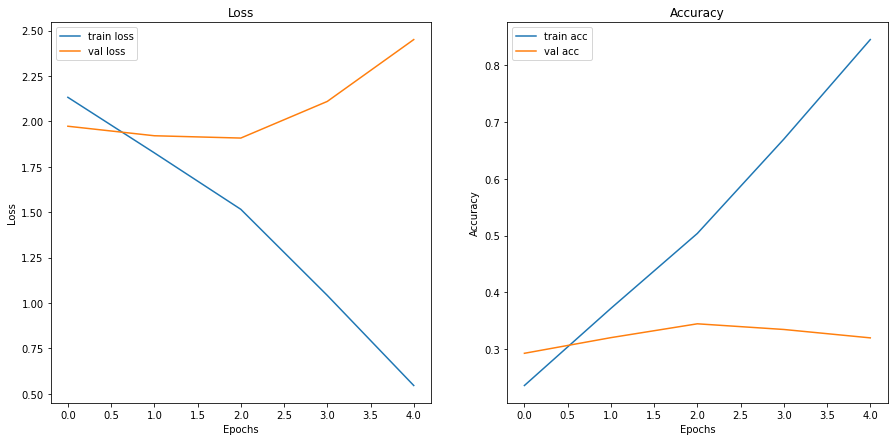

In [11]:
plot_history(history_2)

In [12]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 242, 242, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 121, 121, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 119, 119, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 59, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 34810)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                348110    
Total params: 349,300
Trainable params: 349,300
Non-trainable params: 0
________________________________________________

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 118, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 116, 116, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33640)             0

Looks like our attempt to simplify the model didn't work as it's clear from the model's summary that the trainable parameters didn't changed much so the model has not actually simplified. 

So let's try data augmentation now